In [391]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib as plt
import json




In [392]:
with open('./data/gz_2010_us_040_00_500k.json', 'r') as f:
  USAdata = json.load(f)

In [393]:
with open('./data/Usastates.json','r') as u:
    UsaStates = json.load(u)

In [394]:
print (UsaStates['NJ'])

New Jersey


In [395]:
print (USAdata['features'][0]['properties'])

{'GEO_ID': '0400000US23', 'STATE': '23', 'NAME': 'Maine', 'LSAD': '', 'CENSUSAREA': 30842.923}


In [428]:
df=pd.read_csv('./data/Complications_-_Hospital.csv',delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 52998 non-null  int64 
 1   Provider ID           52998 non-null  int64 
 2   Hospital Name         52998 non-null  object
 3   Address               52998 non-null  object
 4   City                  52998 non-null  object
 5   State                 52998 non-null  object
 6   ZIP Code              52998 non-null  int64 
 7   County Name           52833 non-null  object
 8   Phone Number          52998 non-null  int64 
 9   Measure Name          52998 non-null  object
 10  Measure ID            52998 non-null  object
 11  Compared to National  52998 non-null  object
 12  Denominator           52998 non-null  object
 13  Score                 52998 non-null  object
 14  Lower Estimate        52998 non-null  object
 15  Higher Estimate       52998 non-null

In [429]:
df.head()

,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,0,390045,WILLIAMSPORT REGIONAL MEDICAL CENTER,700 HIGH STREET,WILLIAMSPORT,PA,17701,LYCOMING,5703211000,Infections from a large venous catheter,PSI_7_CVCBI,No Different than the National Rate,5725,0.25,0.00,0.49,NaN,07/01/2013,06/30/2015,"700 HIGH STREET\nWILLIAMSPORT, PA 17701\n(41.2..."
1,1,390032,ALLEGHENY VALLEY HOSPITAL,1301 CARLISLE ST,NATRONA,PA,15065,ALLEGHENY,4122245100,Deaths among Patients with Serious Treatable C...,PSI_4_SURG_COMP,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,1 - The number of cases/patients is too few to...,07/01/2013,06/30/2015,"1301 CARLISLE ST\nNATRONA, PA 15065\n(40.61719..."
2,2,390003,GEISINGER - BLOOMSBURG HOSPITAL,549 EAST FAIR STREET,BLOOMSBURG,PA,17815,COLUMBIA,5703872100,Collapsed lung due to medical treatment,PSI_6_IAT_PTX,No Different than the National Rate,943,0.40,0.07,0.72,NaN,07/01/2013,06/30/2015,"549 EAST FAIR STREET\nBLOOMSBURG, PA 17815\n(4..."
3,3,381312,COQUILLE VALLEY HOSPITAL DISTRICT,940 EAST 5TH STREET,COQUILLE,OR,97423,COOS,5413963101,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,98,3.9,2.3,6.4,NaN,04/01/2012,03/31/2015,"940 EAST 5TH STREET\nCOQUILLE, OR 97423\n(43.1..."
4,4,380102,SACRED HEART MEDICAL CENTER - RIVERBEND,3333 RIVERBEND DRIVE,SPRINGFIELD,OR,97477,LANE,5412227300,Broken hip from a fall after surgery,PSI_8_POST_HIP,No Different than the National Rate,2502,0.06,0.06,0.06,NaN,07/01/2013,06/30/2015,"3333 RIVERBEND DRIVE\nSPRINGFIELD, OR 97477\n(..."


In [430]:
df.astype({'Measure ID': 'string'}).dtypes

index                    int64
Provider ID              int64
Hospital Name           object
Address                 object
City                    object
State                   object
ZIP Code                 int64
County Name             object
Phone Number             int64
Measure Name            object
Measure ID              string
Compared to National    object
Denominator             object
Score                   object
Lower Estimate          object
Higher Estimate         object
Footnote                object
Measure Start Date      object
Measure End Date        object
Location                object
dtype: object

In [399]:
UsaStates['AL']

'Alabama'

Hay que recorrer todas las rows del csv leer el código del estado y añadirle el nombre en una columna llamada statename

In [400]:
statenames= []
for index,row in df.iterrows():
    for key in UsaStates:
        if key == row['State']:
            df.loc[index,'Statename']=UsaStates[key]


print(df['Statename'])
# df['StateName'] = statenames

0        Pennsylvania
1        Pennsylvania
2        Pennsylvania
3              Oregon
4              Oregon
             ...     
52993    Pennsylvania
52994    Pennsylvania
52995    Pennsylvania
52996          Oregon
52997          Oregon
Name: Statename, Length: 52998, dtype: object


In [431]:
df.describe()

,index,Provider ID,ZIP Code,Phone Number
count,52998.00000,52998.000000,52998.000000,5.299800e+04
mean,26498.50000,267983.546492,53956.188667,5.849487e+09
std,15299.34912,156631.303289,26913.328825,2.329549e+09
min,0.00000,10001.000000,603.000000,9.369338e+08
25%,13249.25000,140185.000000,33013.000000,4.017694e+09
50%,26498.50000,260037.000000,55395.500000,6.053298e+09
75%,39747.75000,390211.000000,76020.000000,7.877569e+09
max,52997.00000,670112.000000,99929.000000,9.898943e+09


In [402]:

df_knee=df[df['Measure ID'].str.contains("KNEE")]

In [403]:
df_knee.head()

,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,...,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location,Statename
3,3,381312,COQUILLE VALLEY HOSPITAL DISTRICT,940 EAST 5TH STREET,COQUILLE,OR,97423,COOS,5413963101,Rate of complications for hip/knee replacement...,...,No Different than the National Rate,98,3.9,2.3,6.4,NaN,04/01/2012,03/31/2015,"940 EAST 5TH STREET\nCOQUILLE, OR 97423\n(43.1...",Oregon
6,6,390072,BERWICK HOSPITAL CENTER,701 EAST 16TH STREET,BERWICK,PA,18603,COLUMBIA,5707595000,Rate of complications for hip/knee replacement...,...,No Different than the National Rate,76,2.9,1.7,4.9,NaN,04/01/2012,03/31/2015,"701 EAST 16TH STREET\nBERWICK, PA 18603\n(41.0...",Pennsylvania
11,11,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Rate of complications for hip/knee replacement...,...,No Different than the National Rate,246,3.0,1.9,4.5,NaN,04/01/2012,03/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",Alabama
28,28,381302,SAMARITAN NORTH LINCOLN HOSPITAL,3043 NE 28TH STREET,LINCOLN CITY,OR,97367,LINCOLN,5419943661,Rate of complications for hip/knee replacement...,...,No Different than the National Rate,37,3.6,2.0,6.1,NaN,04/01/2012,03/31/2015,"3043 NE 28TH STREET\nLINCOLN CITY, OR 97367\n(...",Oregon
36,36,381308,WEST VALLEY HOSPITAL,525 SE WASHINGTON STREET,DALLAS,OR,97338,POLK,5036238301,Rate of complications for hip/knee replacement...,...,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,04/01/2012,03/31/2015,"525 SE WASHINGTON STREET\nDALLAS, OR 97338\n(4...",Oregon


In [404]:
knee_per=df_knee['index'].count()/df['index'].count()
percentage_knee= "{:.0%}".format(knee_per)
print (percentage_knee)

9%


In [405]:
df_plot_by_state=df_knee['index'].groupby(df['Statename']).count().sort_values(ascending=False)
df_plot_by_state=pd.DataFrame({'count' : df_knee['index'].groupby( df_knee[ "Statename"] ).count()}).reset_index().sort_values(by='count',ascending=False)


In [406]:
df_plot_by_state.head()


,Statename,count
47,Texas,407
5,California,345
10,Florida,187
15,Illinois,179
34,New York,174


In [407]:
for index,row in df_plot_by_state.iterrows():
    for feature in USAdata['features']:
        if feature['properties']['NAME'] == row['Statename']:
            df_plot_by_state.loc[index,'id']=feature['properties']['GEO_ID']
        

In [408]:
df_plot_by_state.head()

,Statename,count,id
47,Texas,407,0400000US48
5,California,345,0400000US06
10,Florida,187,0400000US12
15,Illinois,179,0400000US17
34,New York,174,0400000US36


In [409]:
import re

In [410]:
df_otro=df_plot_by_state.id.str.extract(r'(\d{6}[a-zA-Z]{2})([0-9]{2})', expand=False)

In [411]:
df_plot_by_state=df_plot_by_state.join(df_otro,lsuffix='index')

In [412]:
df_plot_by_state.rename(columns={1:'fips'},inplace=True)

In [413]:
df_plot_by_state.head()

,Statename,count,id,0,fips
47,Texas,407,0400000US48,400000US,48
5,California,345,0400000US06,400000US,06
10,Florida,187,0400000US12,400000US,12
15,Illinois,179,0400000US17,400000US,17
34,New York,174,0400000US36,400000US,36


In [415]:
df_plot_by_state.dropna(inplace=True)

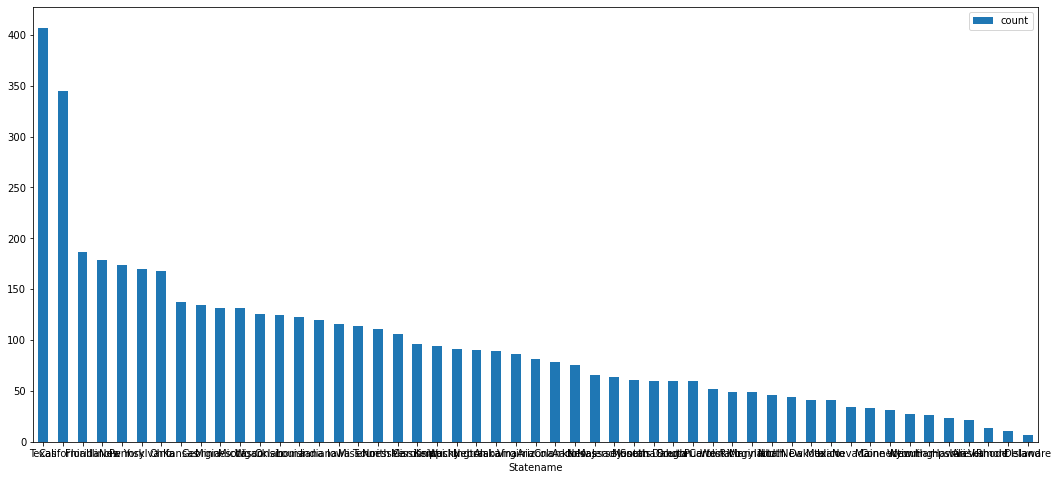

In [416]:
plt.rcParams['figure.figsize'] = [18, 8]
ax = df_plot_by_state.plot.bar(x='Statename',y='count',rot=0)



In [417]:
pio.renderers.default = "browser"

In [418]:
fig= px.choropleth(df_plot_by_state,locations='fips',geojson=USAdata,color='count',color_continuous_scale="Viridis",featureidkey="properties.STATE",
                           scope="usa",
                           labels={'count':'number of knee complications'})

In [419]:
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
plt.pyplot.savefig('./data/usa_knee_map.jpg')

<Figure size 1296x576 with 0 Axes>

<img src="./data/usa_knee_map.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

## Ahora quiero pintar cuantos casos hay de cada complicacion por cada estado.
    

 

me tiene que quedar tal que asi:

|complicacion [Measure ID] | estado [State] | numero de casos [Count]|
|-------------|--------|----------------|
|fracture    | CA     | 5|
|fracture    | TX     | 2|

In [432]:
df_=pd.DataFrame(df[['Measure ID','State','index']].groupby(['Measure ID','State']).size())
df.reset_index(inplace=True)
df.query('State=="NJ"')

,level_0,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,...,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
14339,14339,14339,310003,PALISADES MEDICAL CENTER,7600 RIVER RD,NORTH BERGEN,NJ,7047,HUDSON,2018545000,...,PSI_90_SAFETY,No Different than the National Rate,Not Available,1.14,0.79,1.49,NaN,07/01/2013,06/30/2015,"7600 RIVER RD\nNORTH BERGEN, NJ 07047\n(40.794..."
14351,14351,14351,310021,ST FRANCIS MEDICAL CENTER,601 HAMILTON AVE,TRENTON,NJ,8629,MERCER,6095995000,...,PSI_90_SAFETY,Worse than the National Rate,Not Available,1.35,0.96,1.73,NaN,07/01/2013,06/30/2015,"601 HAMILTON AVE\nTRENTON, NJ 08629\n(40.21712..."
14352,14352,14352,310028,NEWTON MEDICAL CENTER,175 HIGH ST,NEWTON,NJ,7860,SUSSEX,9735798300,...,PSI_7_CVCBI,No Different than the National Rate,4958,0.11,0.00,0.38,NaN,07/01/2013,06/30/2015,"175 HIGH ST\nNEWTON, NJ 07860\n(41.055697, -74..."
14367,14367,14367,310028,NEWTON MEDICAL CENTER,175 HIGH ST,NEWTON,NJ,7860,SUSSEX,9735798300,...,PSI_8_POST_HIP,No Different than the National Rate,457,0.06,0.06,0.06,NaN,07/01/2013,06/30/2015,"175 HIGH ST\nNEWTON, NJ 07860\n(41.055697, -74..."
14378,14378,14378,310028,NEWTON MEDICAL CENTER,175 HIGH ST,NEWTON,NJ,7860,SUSSEX,9735798300,...,PSI_90_SAFETY,No Different than the National Rate,Not Available,0.95,0.62,1.27,NaN,07/01/2013,06/30/2015,"175 HIGH ST\nNEWTON, NJ 07860\n(41.055697, -74..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46071,46071,46071,310096,SAINT MICHAEL'S MEDICAL CENTER,111 CENTRAL AVENUE,NEWARK,NJ,7102,ESSEX,9738775350,...,PSI_7_CVCBI,No Different than the National Rate,3245,0.23,0.00,0.47,NaN,07/01/2013,06/30/2015,"111 CENTRAL AVENUE\nNEWARK, NJ 07102\n(40.7430..."
46072,46072,46072,310073,JERSEY SHORE UNIVERSITY MEDICAL CENTER,1945 RTE 33,NEPTUNE,NJ,7754,MONMOUTH,7327755500,...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,571,2.71,0.64,4.77,NaN,07/01/2013,06/30/2015,"1945 RTE 33\nNEPTUNE, NJ 07754\n(40.207661, -7..."
46073,46073,46073,310092,CAPITAL HEALTH SYSTEM-FULD CAMPUS,750 BRUNSWICK AVE,TRENTON,NJ,8638,MERCER,6093946000,...,PSI_6_IAT_PTX,No Different than the National Rate,6141,0.45,0.17,0.73,NaN,07/01/2013,06/30/2015,"750 BRUNSWICK AVE\nTRENTON, NJ 08638\n(40.2359..."
46075,46075,46075,310047,SHORE MEDICAL CENTER,100 MEDICAL CENTER WAY,SOMERS POINT,NJ,8244,ATLANTIC,6096533545,...,PSI_4_SURG_COMP,No Different than the National Rate,36,163.99,112.40,215.58,NaN,07/01/2013,06/30/2015,"100 MEDICAL CENTER WAY\nSOMERS POINT, NJ 08244..."


In [422]:
def plot_bar_df(df,title,x_label,y_label,color):
    plt.rcParams['figure.figsize'] = [18, 8]
    ax = df.plot.bar(stacked=True,x=x_label,y=y_label,rot=0,color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.pyplot.savefig('./data/'+title+'.jpg')

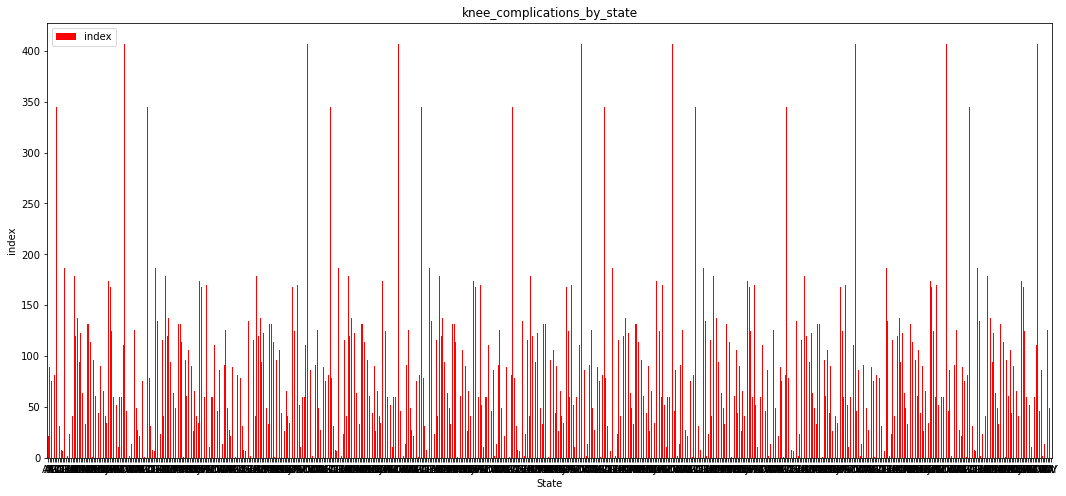

In [423]:
plot_bar_df(df,'knee_complications_by_state','State','index','red')

In [424]:
#there are some values "Not Available" in the feature Score we have to remove before changing the type to float
df = df[~df["Score"].str.contains("Not Available",na=False)]
df.astype({'Score': 'float64'}).dtypes

KeyError: 'Score'

In [ ]:
fig = px.scatter(df, x="State", 
	         size="Score", color="Measure ID",  size_max=60)
fig.show()